# <center>CSC420 Project  <br><br> DVD Cover Project<br> <br> Student Number: 1002572236 <br><br>Name: Danil Redko</center>


                                                                                           

Let's start by importing the needed libraries:

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.spatial.distance import euclidean as euc



In [47]:
cover = cv2.imread('data/DVDcovers/shrek2.jpg')[:,:,::-1]
test = cv2.imread('data/test/image_01.jpeg')[:,:,::-1]

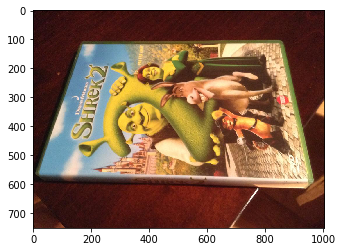

In [48]:
plt.imshow(test)

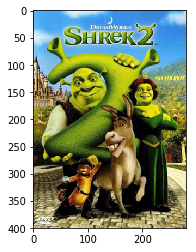

In [49]:
plt.imshow(cover)

In [54]:
def get_interest_points(img):
    img1 = img.copy()
    sift = cv2.xfeatures2d.SIFT_create()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    kp, des = sift.detectAndCompute(gray, None)

    return cv2.drawKeypoints(gray, kp, img1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS), kp, des

In [55]:
def matching(img1, img2):
    
    _, kp1, des1 = get_interest_points(img1)
    _, kp2, des2 = get_interest_points(img2)
    match = []
    kp_diff = []

    for j in range(0, len(kp1)):

        for i in range(0, len(kp2)):
            euc_dist = euc(des1[j], des2[i])
            if euc_dist < 100:
                kp_diff.append(euc_dist)
                match.append([kp1[j],kp2[i]])
            
    return match




In [59]:
def match_images(img1, img2):
    
    img1_show = img1.copy()
    img2_show = img2.copy()
    
    matches = matching(img1, img2)
    
    kp1, kp2, kp3 = matches[5], matches[3], matches[10]
    
    x1, y1 = kp1[0].pt 
    x2, y2 = kp1[1].pt
    
    x3, y3 = kp2[0].pt 
    x4, y4 = kp2[1].pt
    
    x5, y5 = kp3[0].pt 
    x6, y6 = kp3[1].pt
    
    
    f = plt.figure(figsize=(20,20))
    f.add_subplot(1,2, 1)
    plt.scatter(x1, y1, color='r', linewidth=50)
    plt.scatter(x3, y3, color='b',  linewidth=50)
    plt.scatter(x5, y5, color='y',  linewidth=50)
    plt.imshow(img1_show)
    f.add_subplot(1,2,2)
    plt.imshow(img2_show)
    plt.scatter(x2, y2, color='r',  linewidth=20)
    plt.scatter(x4, y4, color='b',  linewidth=20)
    plt.scatter(x6, y6, color='y',  linewidth=20)
    

    

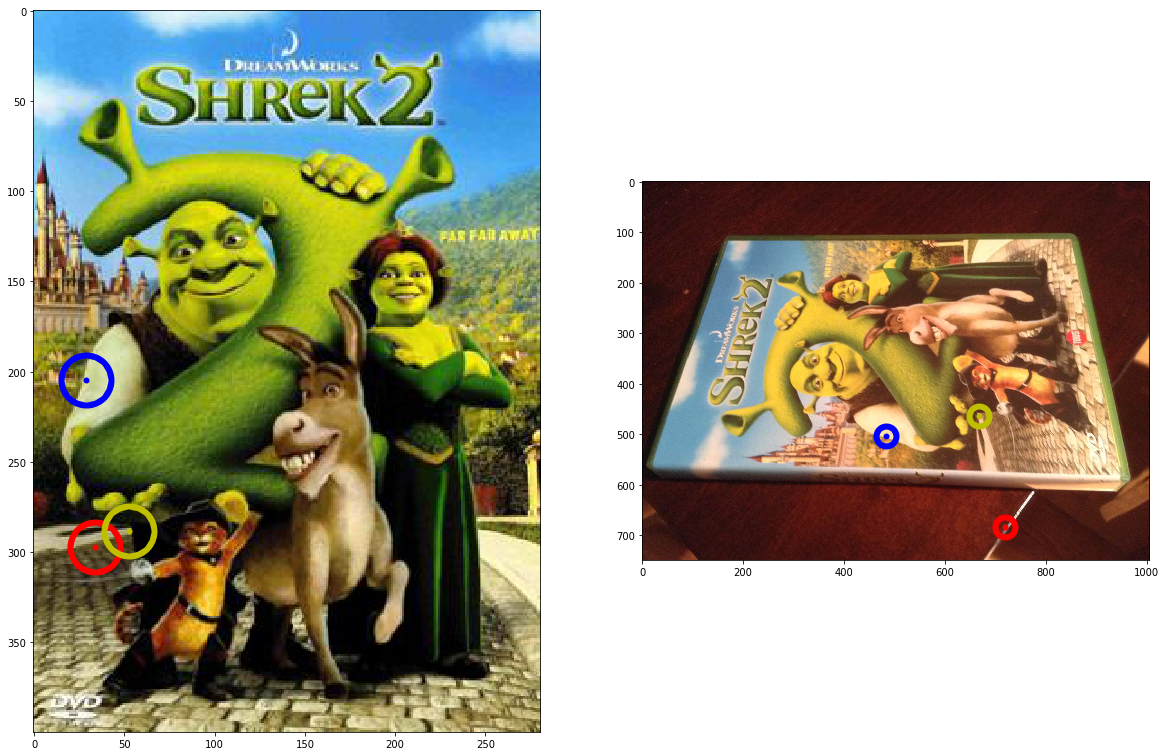

In [60]:
match_images(cover, test)

We need to compute the homography. 

# Ah = 0 <br>

where $A$ is $2n \times 9$ <br> <br>

$h$ is $9 \times 1$ <br><br>

So we have an equation in the following form : <br><br>

$\begin{bmatrix}
    x_{1} & y_{1} & 1 & 0 & 0 & 0 & -x^{'}_{1}x_{1} & -x^{'}_{1}y_{1} & -x^{'}_{1} \\
    0 & 0 & 0 & x_{1} & y_{1} & 1 & -y^{'}_{1}x_{1} & -y^{'}_{1}y_{1} & -y^{'}_{1} \\
       & & & & &\vdots \\
    x_{n} & y_{n} & 1 & 0 & 0 & 0 & -x^{'}_{n}x_{n} & -x^{'}_{n}y_{n} & -x^{'}_{n} \\
    0 & 0 & 0 & x_{n} & y_{n} & 1 & -y^{'}_{n}x_{n} & -y^{'}_{n}y_{n} & -y^{'}_{n}
\end{bmatrix}$ $\begin{bmatrix} h_{00} \\h_{01}\\h_{02}\\h_{10}\\h_{11}\\h_{12}\\h_{20}\\h_{21}\\h_{22} \end{bmatrix}$ =  $\begin{bmatrix} 0 \\ 0 \\ \vdots \\ 0 \\ 0 \end{bmatrix}$

In [62]:
def compute_homography(matches):
    
    
    number_of_matches = len(matches)
    
    
    
    